In [1]:
import pyforest

In [2]:
df = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

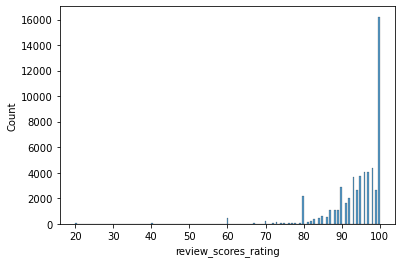

In [5]:
sns.histplot(df["review_scores_rating"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

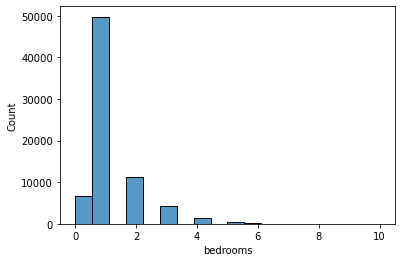

In [6]:
sns.histplot(df["bedrooms"])
plt.show()

In [7]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x576 with 0 Axes>

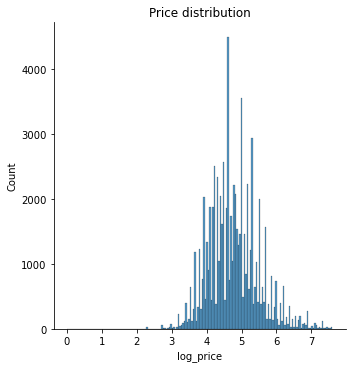

In [8]:
plt.figure(figsize = (10, 8))
sns.displot(df["log_price"])
plt.title('Price distribution')
plt.show()

In [9]:
df.room_type.value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

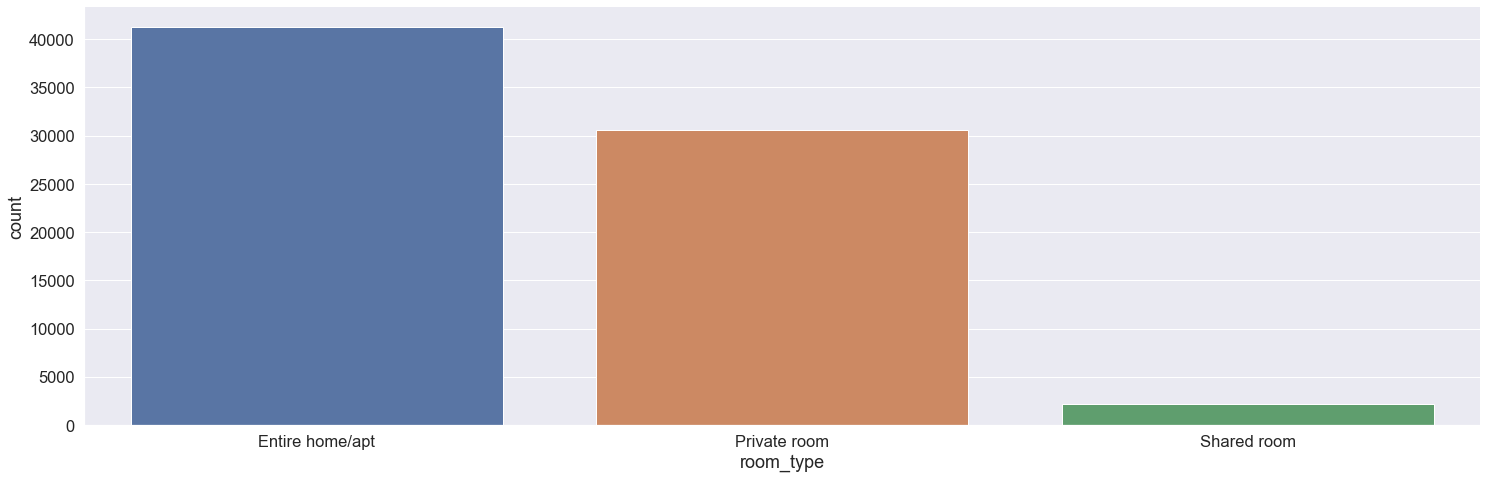

In [10]:
sns.set(font_scale=1.5)
sns.catplot(x='room_type',kind='count',data=df, height=7, aspect=3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

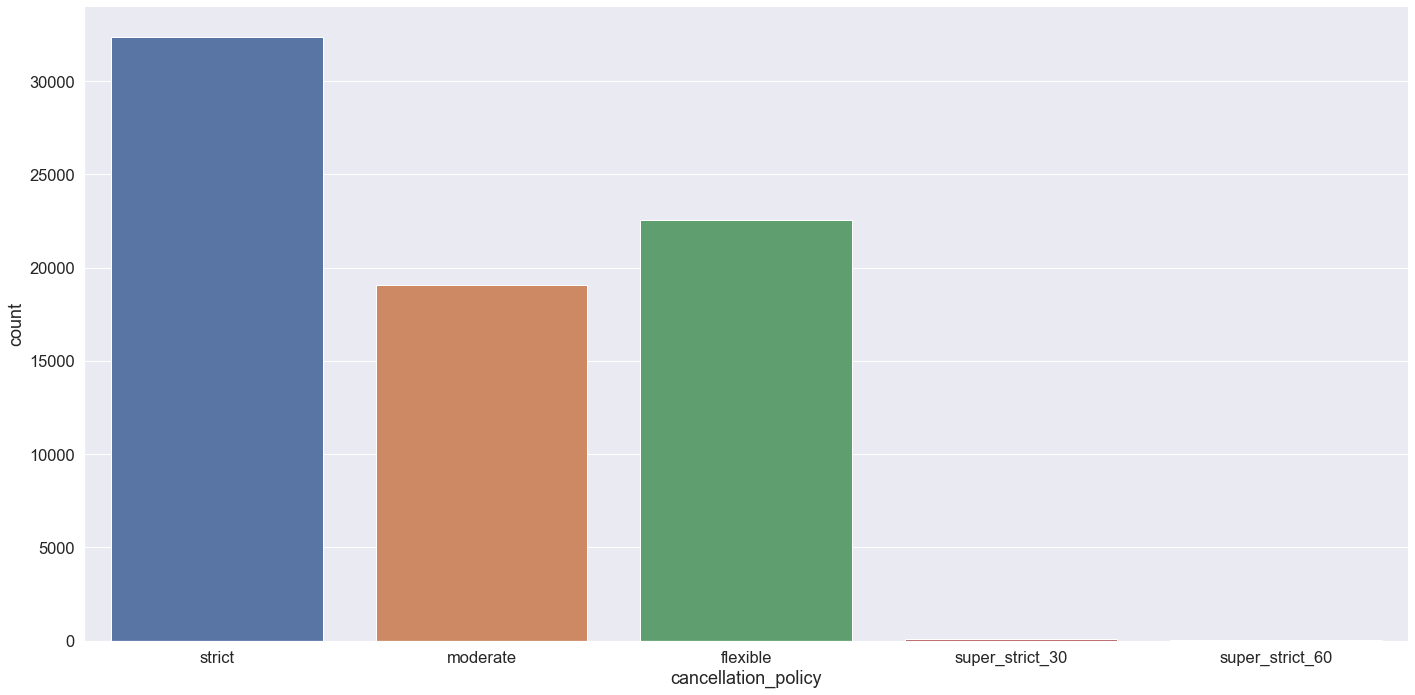

In [11]:
sns.set(font_scale=1.5)
sns.catplot(x='cancellation_policy',kind='count',data=df, height=10, aspect=2)

In [12]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'bool':
        categorical.append(i)
        
    else:
        numerical.append(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

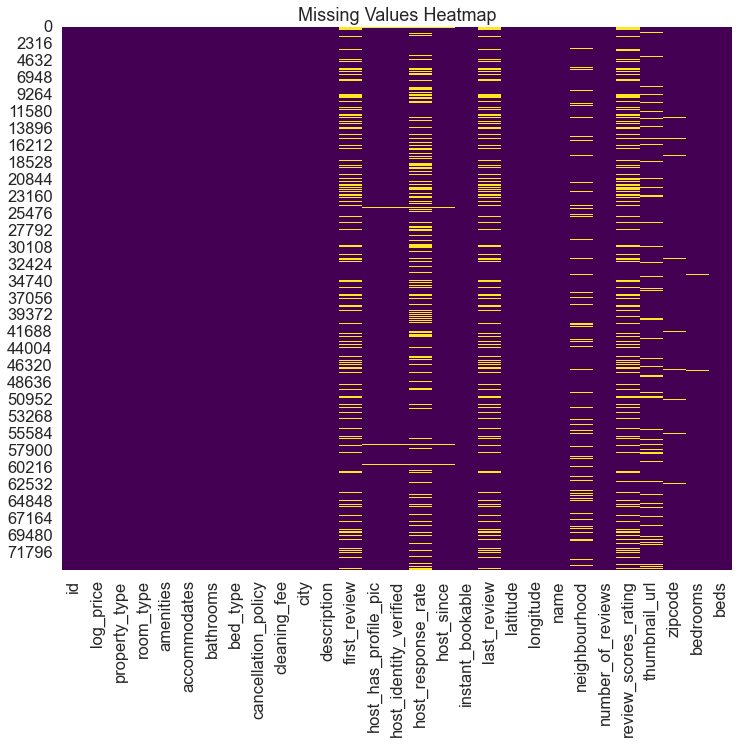

In [13]:
missing_data = df.isnull()

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 10))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
df_cat = df[categorical]
df_num = df[numerical]

In [15]:
df_cat.isnull().sum()

property_type                 0
room_type                     0
amenities                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
name                          0
neighbourhood              6872
thumbnail_url              8216
zipcode                     966
dtype: int64

In [16]:
df_cat.cleaning_fee.value_counts()

True     54403
False    19708
Name: cleaning_fee, dtype: int64

In [17]:
df_cat.host_response_rate.head()

0     NaN
1    100%
2    100%
3     NaN
4    100%
Name: host_response_rate, dtype: object

In [18]:
df_cat.drop(['first_review', 'last_review', 'host_response_rate', 'thumbnail_url', 'zipcode', 'amenities'], axis=1, inplace=True)

/tmp/ipykernel_25001/548580711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(['first_review', 'last_review', 'host_response_rate', 'thumbnail_url', 'zipcode', 'amenities'], axis=1, inplace=True)


In [19]:
df_cat.isnull().sum()

property_type                0
room_type                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_has_profile_pic       188
host_identity_verified     188
host_since                 188
instant_bookable             0
name                         0
neighbourhood             6872
dtype: int64

In [20]:
missing = ['host_has_profile_pic', 'host_identity_verified', 'host_since', 'neighbourhood']
for i in missing:
    mode_category = df_cat[i].mode()[0]

# Impute missing values with the mode
    df_cat[i] = df_cat[i].fillna(mode_category)

/tmp/ipykernel_25001/1578217541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = df_cat[i].fillna(mode_category)
/tmp/ipykernel_25001/1578217541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = df_cat[i].fillna(mode_category)
/tmp/ipykernel_25001/1578217541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [21]:
df_cat.isnull().sum()

property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_since                0
instant_bookable          0
name                      0
neighbourhood             0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

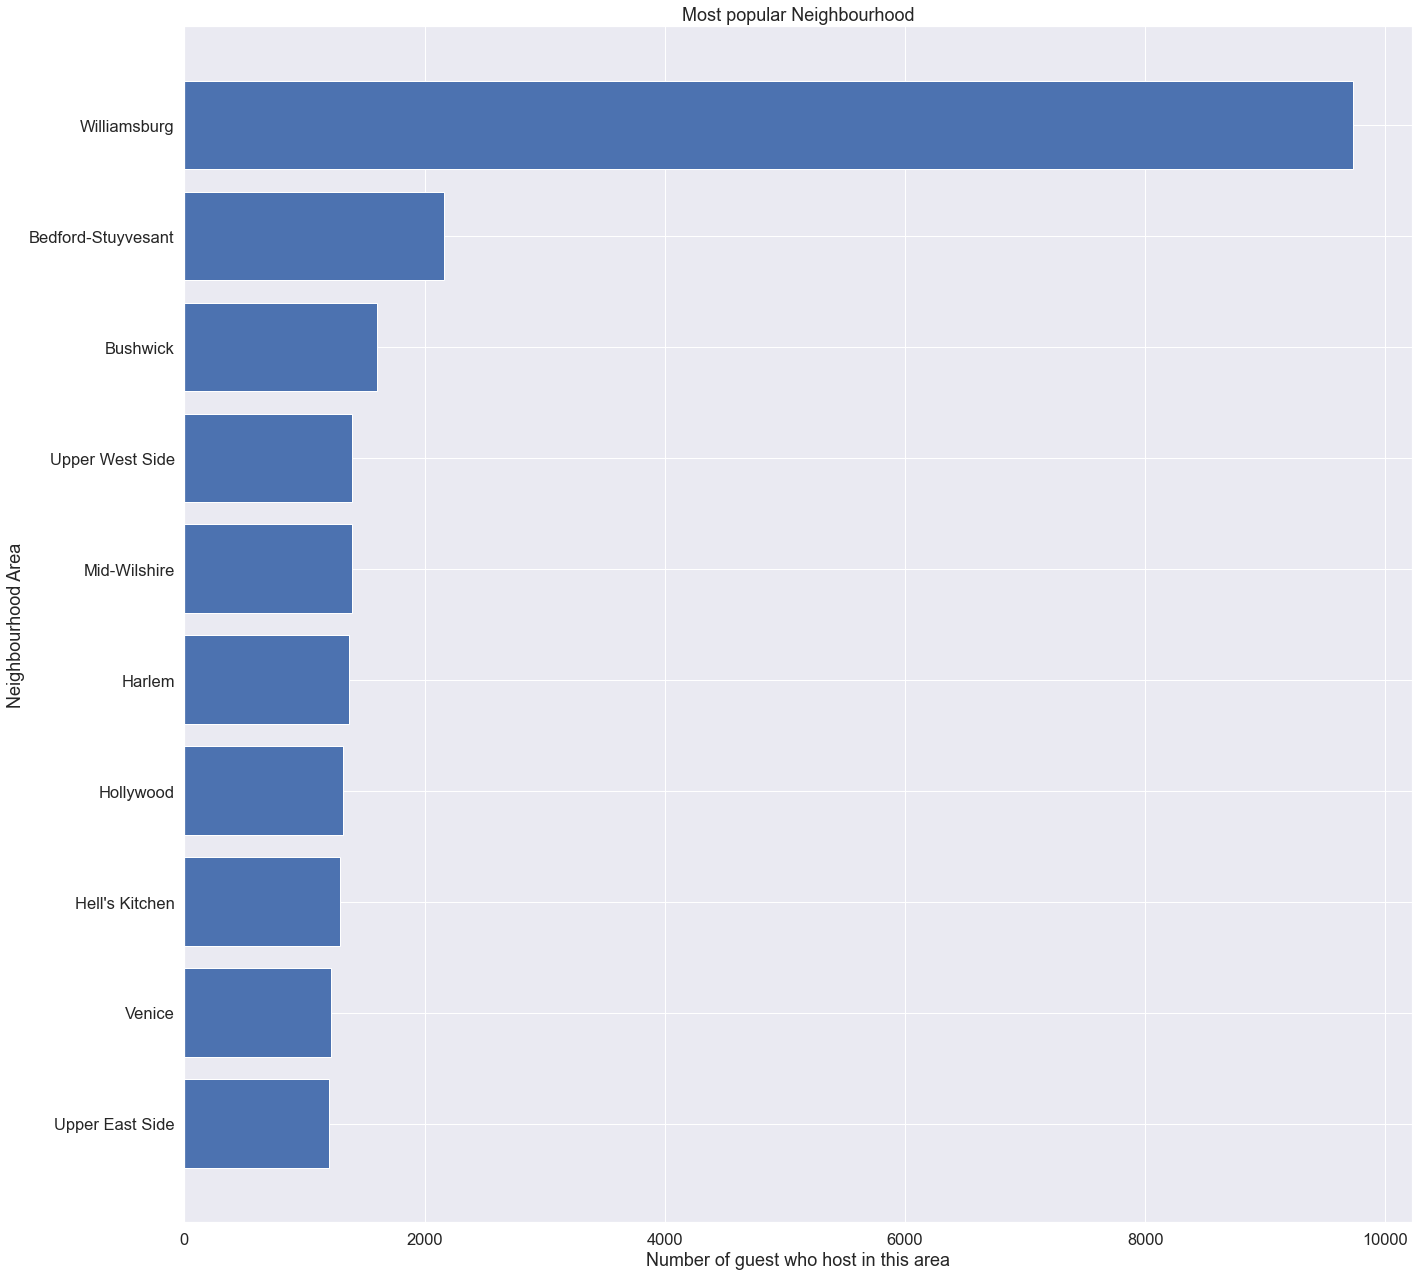

In [22]:
data = df_cat.neighbourhood.value_counts()[:10]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [23]:
df_cat.isnull().sum()

property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_since                0
instant_bookable          0
name                      0
neighbourhood             0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])

/tmp/ipykernel_25001/3504323182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])


In [26]:
df_cat.head()

,property_type,room_type,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,name,neighbourhood
0,0,0,4,2,1,4,9972,1,1,1069,0,10464,77
1,0,0,4,2,1,4,19019,1,0,2980,1,65672,252
2,0,0,4,1,1,4,55642,1,1,2743,1,66396,247
3,17,0,4,0,1,5,63089,1,1,2188,0,9387,325
4,0,0,4,1,1,2,15914,1,1,2139,1,32068,119


In [29]:
df_cat.drop(df_cat[['description', 'host_since', 'name', 'neighbourhood']], axis=1, inplace=True)

/tmp/ipykernel_25001/786777531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(df_cat[['description', 'host_since', 'name', 'neighbourhood']], axis=1, inplace=True)


In [30]:
df_cat.head()

,property_type,room_type,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable
0,0,0,4,2,1,4,1,1,0
1,0,0,4,2,1,4,1,0,1
2,0,0,4,1,1,4,1,1,1
3,17,0,4,0,1,5,1,1,0
4,0,0,4,1,1,2,1,1,1


### Deal with Numerical Columns

In [32]:
df_num.isnull().sum()

id                          0
log_price                   0
accommodates                0
bathrooms                 200
latitude                    0
longitude                   0
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

In [39]:
mode_fill = ['bathrooms', 'bedrooms', 'beds']
for i in mode_fill:
    mode_category = df_num[i].mode()[0]
    df_num[i] = df_num[i].fillna(mode_category)

/tmp/ipykernel_25001/1197345236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = df_num[i].fillna(mode_category)
/tmp/ipykernel_25001/1197345236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = df_num[i].fillna(mode_category)
/tmp/ipykernel_25001/1197345236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [41]:
df_num.isnull().sum()

id                          0
log_price                   0
accommodates                0
bathrooms                   0
latitude                    0
longitude                   0
number_of_reviews           0
review_scores_rating    16722
bedrooms                    0
beds                        0
dtype: int64

##### Fill with Kmeans

In [46]:
from sklearn.impute import KNNImputer
imputer = sklearn.impute.KNNImputer(n_neighbors=2)
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

<IPython.core.display.Javascript object>

In [47]:
df_num.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257.0,5.010635,3.0,1.0,40.696524,-73.991617,2.0,100.0,1.0,1.0
1,6304928.0,5.129899,7.0,1.0,40.766115,-73.989040,6.0,93.0,3.0,3.0
2,7919400.0,4.976734,5.0,1.0,40.808110,-73.943756,10.0,92.0,1.0,3.0
3,13418779.0,6.620073,4.0,1.0,37.772004,-122.431619,0.0,98.0,2.0,2.0
4,3808709.0,4.744932,2.0,1.0,38.925627,-77.034596,4.0,40.0,0.0,1.0


In [48]:
df_num.drop(['id'], axis=1, inplace=True)

In [61]:
final_df = pd.concat([df_num, df_cat], axis=1)


<IPython.core.display.Javascript object>

In [62]:
final_df.head()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable
0,5.010635,3.0,1.0,40.696524,-73.991617,2.0,100.0,1.0,1.0,0,0,4,2,1,4,1,1,0
1,5.129899,7.0,1.0,40.766115,-73.989040,6.0,93.0,3.0,3.0,0,0,4,2,1,4,1,0,1
2,4.976734,5.0,1.0,40.808110,-73.943756,10.0,92.0,1.0,3.0,0,0,4,1,1,4,1,1,1
3,6.620073,4.0,1.0,37.772004,-122.431619,0.0,98.0,2.0,2.0,17,0,4,0,1,5,1,1,0
4,4.744932,2.0,1.0,38.925627,-77.034596,4.0,40.0,0.0,1.0,0,0,4,1,1,2,1,1,1


In [63]:
from sklearn.preprocessing import MinMaxScaler

y = final_df['log_price']
X = final_df.drop(final_df[['log_price']], axis=1)

In [64]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

<IPython.core.display.Javascript object>

In [66]:
X.head()

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable
0,0.133333,0.125,0.812859,0.941650,0.003306,1.0000,0.1,0.055556,0.0,0.0,1.0,0.50,1.0,0.8,1.0,1.0,0.0
1,0.400000,0.125,0.820547,0.941700,0.009917,0.9125,0.3,0.166667,0.0,0.0,1.0,0.50,1.0,0.8,1.0,0.0,1.0
2,0.266667,0.125,0.825187,0.942579,0.016529,0.9000,0.1,0.166667,0.0,0.0,1.0,0.25,1.0,0.8,1.0,1.0,1.0
3,0.200000,0.125,0.489762,0.001550,0.000000,0.9750,0.2,0.111111,0.5,0.0,1.0,0.00,1.0,1.0,1.0,1.0,0.0
4,0.066667,0.125,0.617213,0.882593,0.006612,0.2500,0.0,0.055556,0.0,0.0,1.0,0.25,1.0,0.4,1.0,1.0,1.0


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]


In [70]:
results = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared'])


<IPython.core.display.Javascript object>

In [71]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results = results.append({'Model': name, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R-squared': r2}, ignore_index=True)


/tmp/ipykernel_25001/727637336.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R-squared': r2}, ignore_index=True)
/tmp/ipykernel_25001/727637336.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R-squared': r2}, ignore_index=True)
/tmp/ipykernel_25001/727637336.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R-squared': r2}, ignore_index=True)
/tmp/ipykernel_25001/727637336.py:8: FutureWarning: The frame.append method is deprec

In [72]:
results

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,0.239855,0.369040,0.533107
1,Ridge Regression,0.239865,0.369037,0.533088
2,Lasso Regression,0.513785,0.560360,-0.000114
3,Random Forest,0.157320,0.285382,0.693766
4,Gradient Boosting,0.171829,0.303314,0.665524


### Result

With the final Data, different models had different performances.

Random forest performs generally better since it is able to pick out non-linear relationships better
Gradient Boosting also does good since it is a self optiizing algorithm, but Random forest takes this one
